In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

In [ ]:
df = pd.read_excel('data.xlsx')

print(df.isna().sum())
df = df.drop(columns=['date_symptoms_onset', 'date_test', 'date_exit' ]) # remove colunas com muitos valores nulos e que nao afetarao o resultado
print(df.isna().sum())

progressive number       0
date_symptoms_onset    902
date_admission           0
date_test               22
date_exit              484
                      ... 
p_other                  0
p_male                   0
p_age                  902
day_x                    0
week                     0
Length: 75, dtype: int64
progressive number        0
date_admission            0
death                     0
date_covid_diagnosis    396
id_test                   0
                       ... 
p_other                   0
p_male                    0
p_age                   902
day_x                     0
week                      0
Length: 72, dtype: int64


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [43]:
X = df.drop(columns=['has_covid', 'progressive number', 'date_admission', 'date_covid_diagnosis', 
                     'date_test2', 'b_day_disease', 'id_test'], errors='ignore')
df['has_covid'] = df['date_covid_diagnosis'].notna().astype(int)
y = df['has_covid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:

model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9962511715089035
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        74
           1       1.00      1.00      1.00      2060

    accuracy                           1.00      2134
   macro avg       1.00      0.95      0.97      2134
weighted avg       1.00      1.00      1.00      2134



In [47]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

# Inicializando o GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustando os parâmetros
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores parâmetros: {'max_depth': 20, 'n_estimators': 100}


[2.30201442e-02 1.15259554e-02 1.35309991e-01 1.97338518e-01
 9.30472912e-02 5.74427867e-04 1.86752327e-04 4.76415755e-04
 7.30036988e-04 1.18479610e-04 1.45245413e-04 9.28534029e-04
 3.95547977e-04 2.78745101e-04 1.79079298e-05 2.62175713e-04
 7.31280740e-05 1.39185853e-06 2.98882826e-04 4.06613394e-04
 1.58984866e-04 1.92429933e-04 1.44468991e-04 1.92621991e-04
 1.66654869e-04 2.83230155e-04 1.56398359e-04 2.64602649e-04
 4.54077752e-04 5.70332430e-04 2.49614165e-04 1.10399950e-04
 2.82390273e-04 6.13727665e-04 4.41902515e-04 2.50321103e-04
 3.56416222e-05 6.23258175e-06 2.35368174e-05 7.22176186e-05
 8.88781502e-05 5.31694623e-05 1.98578128e-05 1.39823095e-04
 1.96776106e-04 1.50319191e-04 1.30025371e-04 7.58797774e-05
 1.64758294e-05 4.67365789e-05 1.35341316e-04 1.22829841e-04
 1.80213542e-04 1.05177586e-02 2.51897145e-03 3.36100715e-02
 2.37172613e-04 4.80658105e-03 3.22202646e-03 3.72022823e-03
 1.45468653e-03 4.23021642e-02 1.40798987e-02 1.32142057e-01
 1.84812283e-01 9.541380

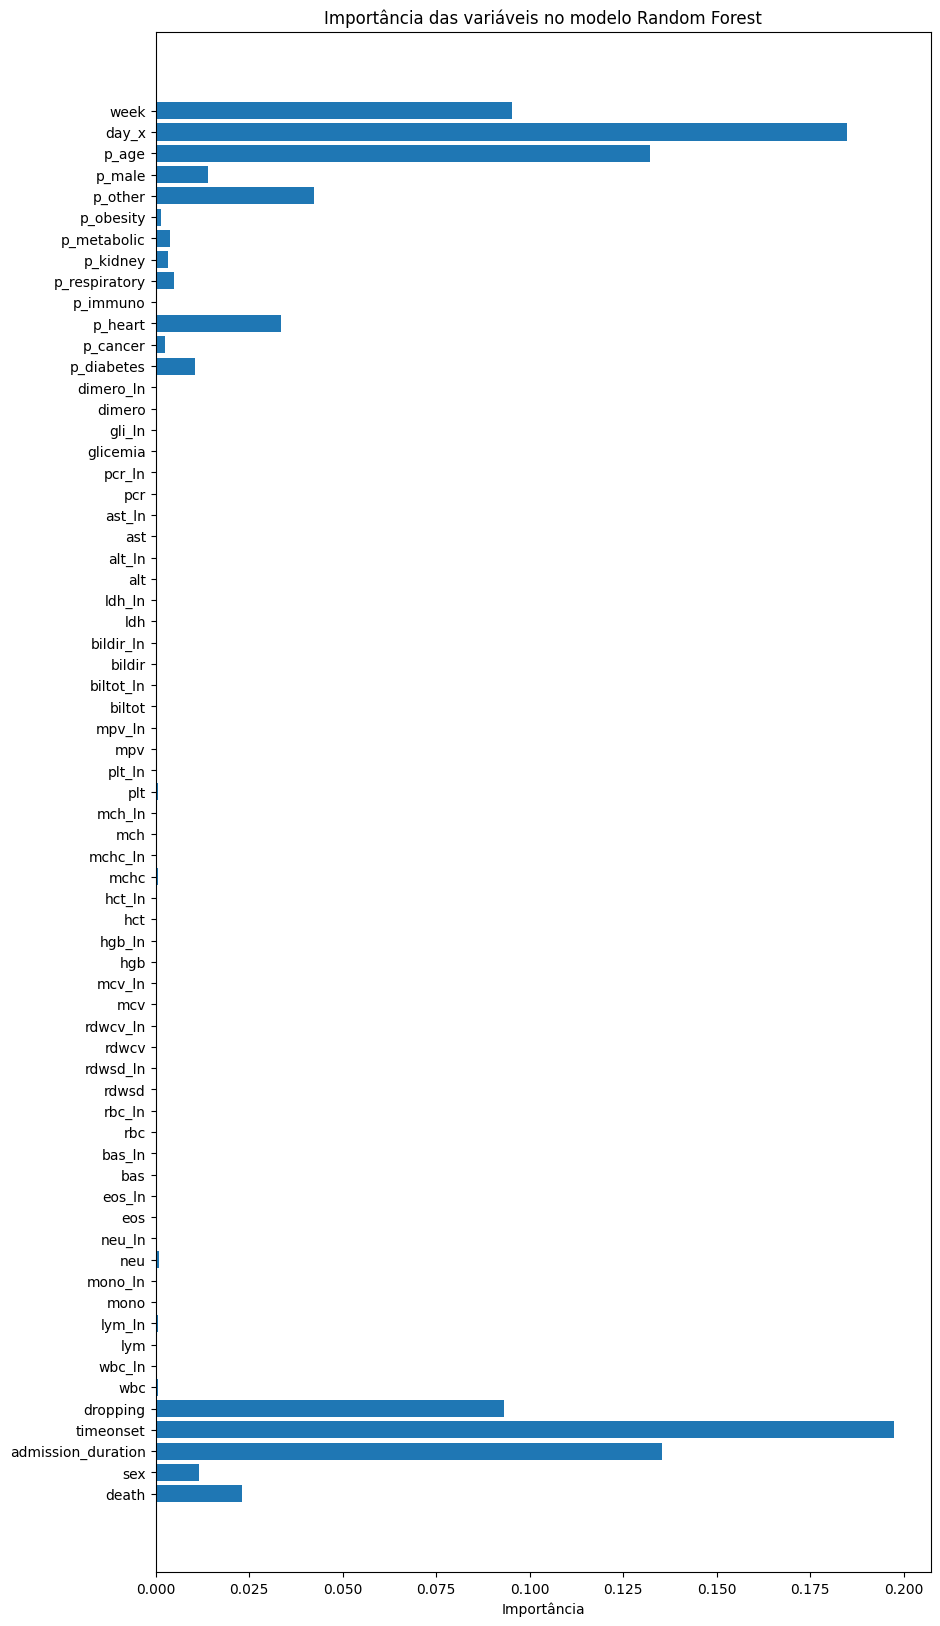

In [48]:
# Plotando a importância das variáveis

importances = model.feature_importances_

print(importances)
plt.figure(figsize=(10, 20))
plt.barh(X.columns, importances)
plt.xlabel('Importância')
plt.title('Importância das variáveis no modelo Random Forest')
plt.show()